In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Task 1 : Read the data and do data pre-processing

In [4]:
df = pd.read_csv('/kaggle/input/drug-classification/drug200.csv')

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Axes: xlabel='Drug', ylabel='Count'>

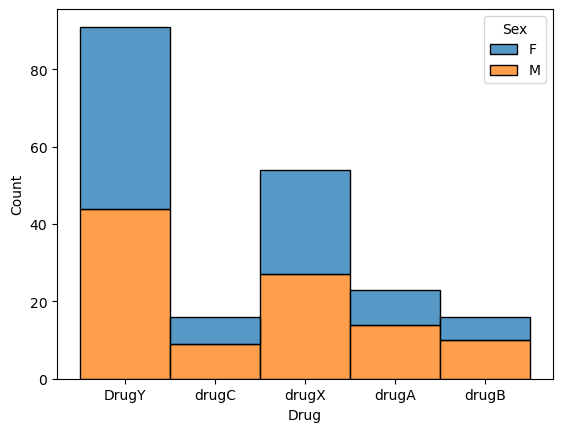

In [9]:
sns.histplot(x = 'Drug', hue = df['Sex'], multiple = 'stack', data = df)

<Axes: xlabel='Na_to_K', ylabel='Count'>

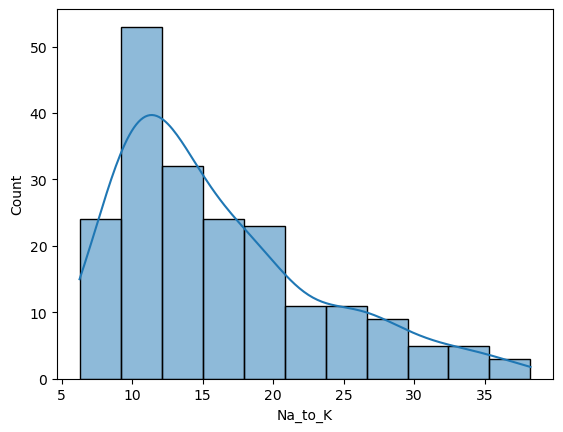

In [10]:
sns.histplot(x = df['Na_to_K'], kde = True)

/tmp/ipykernel_32/3448413712.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


<Figure size 800x550 with 0 Axes>

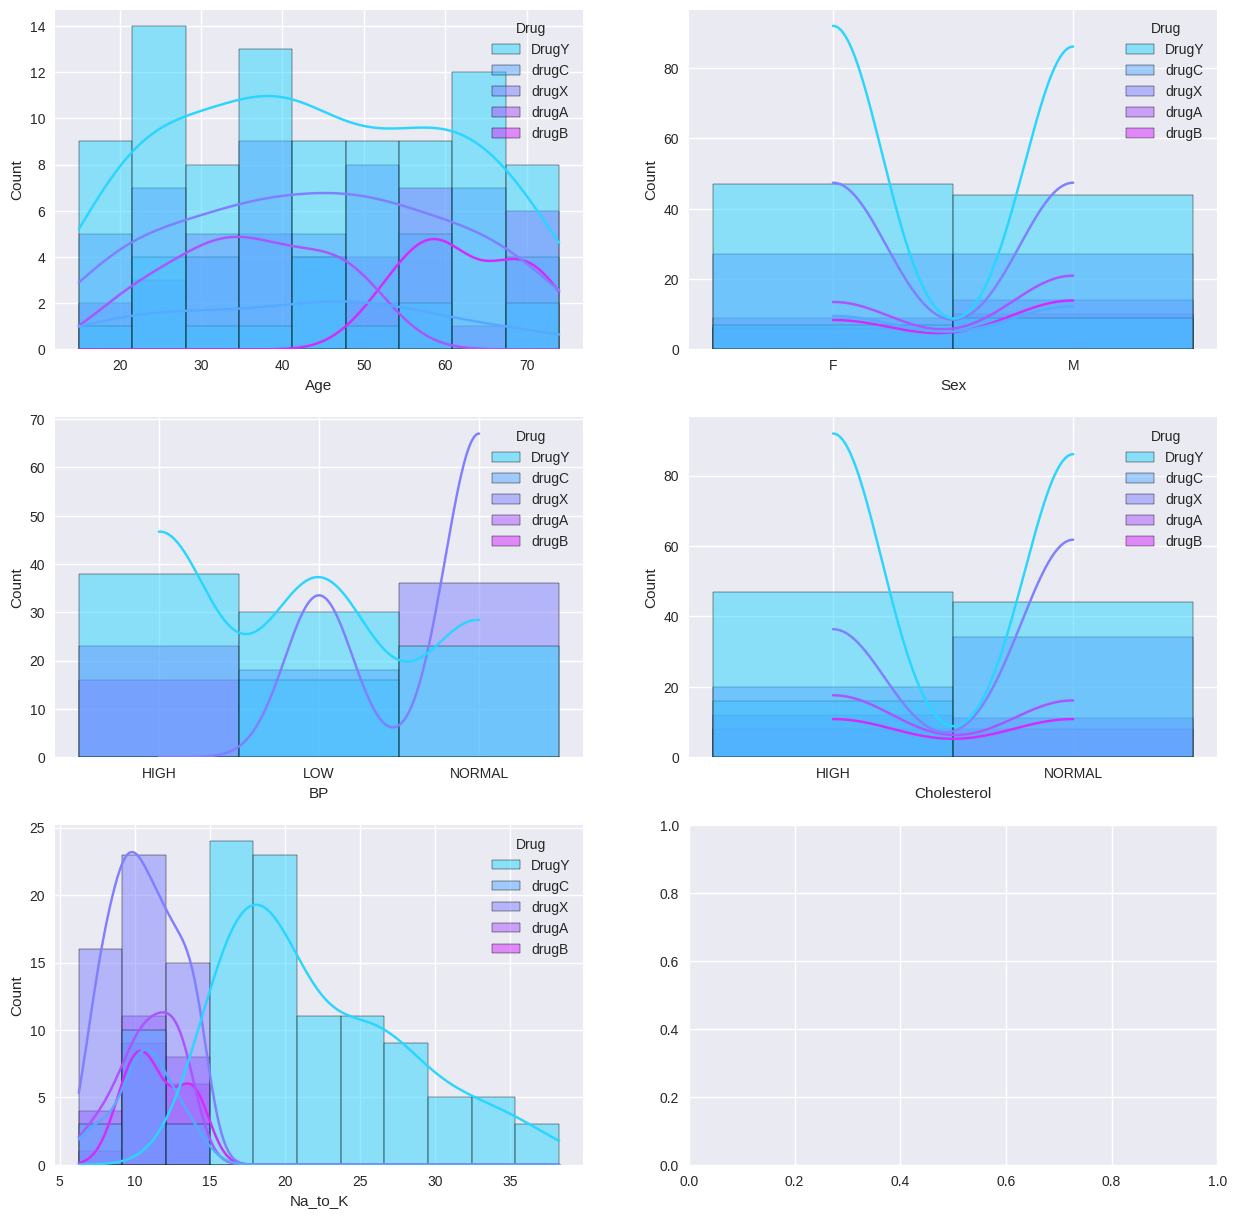

In [11]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'cool'

fig, axs = plt.subplots(3, 2, figsize=(15,15))
i=1
for feature in df.columns:
    if feature not in ["Drug"] and i < 14:
        plt.subplot(3,2,i)
        sns.histplot(data = df, x = feature, kde = True, palette = color, hue = 'Drug')
        i+=1

In [15]:
#Preprocessing

from sklearn.preprocessing import LabelEncoder

list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

df["Na_to_K"] = (df["Na_to_K"] - df["Na_to_K"].min()) / (df["Na_to_K"].max() - df["Na_to_K"].min())

In [14]:
X = df.drop('Drug', axis = 1)
y = df['Drug']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

In [16]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,0.596848,0
1,47,1,1,0,0.213397,3
2,47,1,1,0,0.120239,3
3,28,0,2,0,0.047814,4
4,61,0,1,0,0.368191,0
...,...,...,...,...,...,...
195,56,0,1,0,0.165676,3
196,16,1,1,0,0.179405,3
197,52,1,2,0,0.113359,4
198,23,1,2,1,0.242385,4


In [25]:
xtrain.shape

(150, 5)

# Task 2: Build the ANN Model

In [29]:
model = tf.keras.Sequential([
  tf.keras.Input(shape = (5,)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(5, activation="softmax")
])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=["accuracy"])

# Fit the model
history = model.fit(xtrain,
                       ytrain, epochs=50, validation_data=(xtest, ytest),batch_size = 5)

Epoch 1/50
30/30 [==============================] - 2s 12ms/step - loss: 1.6029 - accuracy: 0.3867 - val_loss: 1.6055 - val_accuracy: 0.2800
Epoch 2/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1789 - accuracy: 0.5733 - val_loss: 1.4081 - val_accuracy: 0.3600
Epoch 3/50
30/30 [==============================] - 0s 4ms/step - loss: 1.1016 - accuracy: 0.5933 - val_loss: 1.2867 - val_accuracy: 0.6200
Epoch 4/50
30/30 [==============================] - 0s 4ms/step - loss: 1.0755 - accuracy: 0.6067 - val_loss: 1.1636 - val_accuracy: 0.6400
Epoch 5/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9730 - accuracy: 0.6667 - val_loss: 1.0826 - val_accuracy: 0.6400
Epoch 6/50
30/30 [==============================] - 0s 4ms/step - loss: 0.9262 - accuracy: 0.6600 - val_loss: 0.9963 - val_accuracy: 0.6400
Epoch 7/50
30/30 [==============================] - 0s 4ms/step - loss: 0.7863 - accuracy: 0.7333 - val_loss: 0.9103 - val_accuracy: 0.6400
Epoch 8/50
30/30 [=

<Axes: >

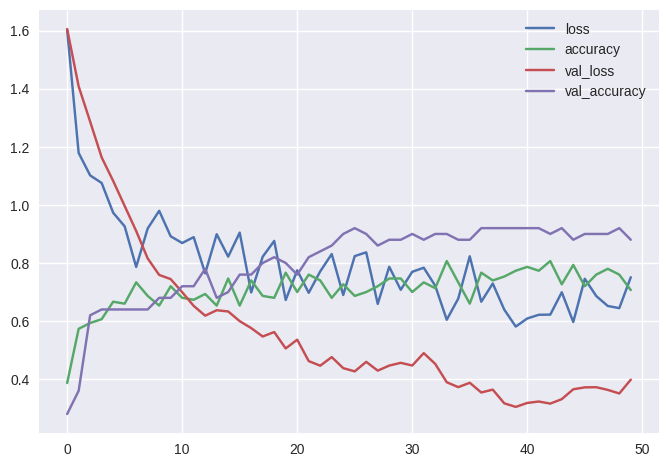

In [30]:
pd.DataFrame(history.history).plot()

In [32]:
#Evaluation

model.evaluate(xtest, ytest)

2/2 [==============================] - 0s 5ms/step - loss: 0.3982 - accuracy: 0.8800


[0.3982274532318115, 0.8799999952316284]

# Task 3 : Testing the model on random data

In [43]:
#Generate 10 rows of random data

ages = np.random.randint(20,51,size = (10,1))
sexes = np.random.choice([0,1],size = (10,1))
bps = np.random.choice([0,1,2],size = (10,1))
cholestrols = np.random.choice([0,1],size = (10,1))
nas = np.random.rand(10,1)

data_rnd = pd.DataFrame(np.concatenate((ages,sexes,bps,cholestrols,nas),axis = 1),columns = ['Age','Sex',
                                                                                            'BP','Cholestrol',
                                                                                            'Na_to_K'])


In [44]:
data_rnd

,Age,Sex,BP,Cholestrol,Na_to_K
0,40.0,0.0,2.0,0.0,0.718650
1,31.0,0.0,0.0,0.0,0.491745
2,29.0,0.0,0.0,1.0,0.610530
3,26.0,1.0,2.0,1.0,0.810163
4,44.0,0.0,0.0,0.0,0.445404
5,33.0,0.0,2.0,1.0,0.473778
6,29.0,1.0,0.0,1.0,0.909534
7,45.0,1.0,2.0,0.0,0.488934
8,47.0,0.0,2.0,1.0,0.728344
9,39.0,0.0,2.0,0.0,0.044319


In [45]:
#Getting the predictions
predictions = pd.DataFrame(np.argmax(model.predict(data_rnd),axis = 1),columns = ['Drug'])

1/1 [==============================] - 0s 146ms/step


In [47]:
predictions

,Drug
0,4
1,1
2,1
3,4
4,1
5,4
6,1
7,4
8,4
9,4
